In [2362]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

pd.options.display.max_columns = 100


#### Считывание и преданализ данных

In [2429]:
data = pd.read_csv('train.csv')

In [2364]:
data.shape

(10000, 20)

In [2365]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [2366]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,8383.407700,4859.019020,0.000000,4169.500000,8394.500000,12592.500000,1.679800e+04
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,2.090000e+02
Rooms,10000.0,1.890500,0.839512,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,10000.0,56.315775,21.058732,1.136859,41.774881,52.513310,65.900625,6.410652e+02
LifeSquare,7887.0,37.199645,86.241209,0.370619,22.769832,32.781260,45.128803,7.480592e+03
KitchenSquare,10000.0,6.273300,28.560917,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.775974,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218671e-01


In [2367]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [2368]:
%matplotlib inline
import matplotlib.pyplot as plt

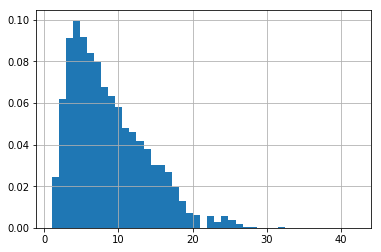

In [2369]:
data['Floor'].hist(bins=43,normed=1)

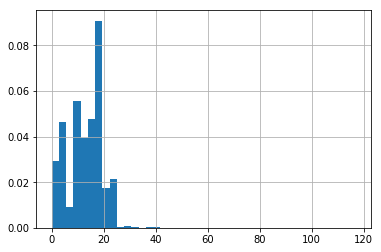

In [2370]:
data['HouseFloor'].hist(bins=42,normed=1);

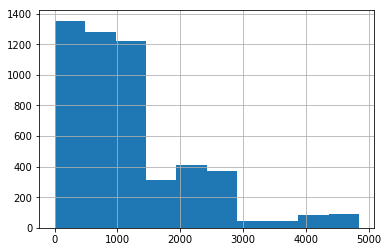

In [2371]:
data['Healthcare_1'].hist();

In [2372]:
data.loc[data['HouseYear'] > 2020, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096


In [2373]:
data.loc[data['HouseYear'] == 20052011, 'HouseYear'] = 2008
data.loc[data['HouseYear'] == 4968, 'HouseYear'] = 1968

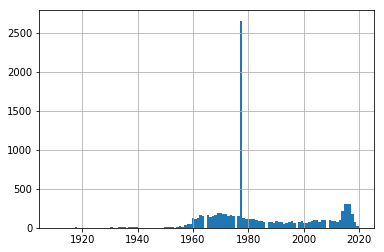

In [2374]:
data['HouseYear'].hist(bins=120);

In [2375]:
np.unique(data['Rooms'])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6., 10., 19.])

In [2376]:
data.loc[data['Rooms'] > 5, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,NaN,5,15,B,317265.323792
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,NaN,0,1,B,78364.616704
2170,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,1322.0,3,8,B,229661.964416
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,30.0,2,4,B,172329.270863


In [2377]:
data.loc[data['Rooms'] == 6, 'Rooms'] = 2
data.loc[data['Rooms'] == 19, 'Rooms'] = 1

In [2378]:
data[(data['Rooms'] ==0)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,NaN,0,0,B,268394.744389
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
2269,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976788
3911,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
4366,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
6149,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,NaN,3,9,B,158998.110646
8834,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,219281.918007


In [2379]:
len(data[data['KitchenSquare'] >20])

48

In [2380]:
#data.loc[data['KitchenSquare'] >30, 'KitchenSquare'] = 30

In [2381]:
len(data[data['LifeSquare'] > data['Square']*0.9 ])

1188

In [2382]:
len(data[data['LifeSquare'] < data['Square']*0.4 ])

273

In [2383]:
data.loc[data['LifeSquare'] < data['Square']*0.4, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
26,4378,27,3.0,106.958871,0.641822,0.0,17,0.0,2018,0.072158,B,B,2,629,1,NaN,0,0,A,337299.867936
95,4280,34,2.0,61.334968,4.091945,1.0,26,1.0,2014,0.069753,B,B,53,13670,4,NaN,1,11,B,286564.441972
134,12613,6,2.0,65.496674,5.589324,1.0,5,17.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,180727.643541
158,16779,27,3.0,51.991064,4.896202,1.0,22,25.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,174687.566186
160,3522,6,1.0,66.419841,3.987101,1.0,2,1.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,193361.229815
210,16505,28,1.0,45.182329,18.062506,9.0,4,23.0,2007,0.333892,B,B,30,6564,1,NaN,0,0,B,238485.472419
270,15215,17,1.0,46.692974,5.941401,1.0,7,1.0,2015,0.000000,B,B,18,3374,5,620.0,1,2,B,212290.684086
279,8727,1,2.0,79.521221,4.634049,1.0,5,1.0,2017,0.007122,B,B,1,264,0,NaN,0,1,B,232726.628137
350,7608,1,1.0,50.412729,17.367961,11.0,10,25.0,2015,0.007122,B,B,1,264,0,NaN,0,1,B,100226.363761
363,15751,9,1.0,44.171793,1.251846,1.0,11,18.0,2017,0.161532,B,B,25,5648,1,30.0,2,4,B,134910.715588


In [2384]:
np.unique(data['Ecology_1'])

array([0.00000000e+00, 1.80000000e-09, 6.99893000e-05, 7.81528000e-05,
       1.69676000e-04, 6.99119000e-04, 9.91363000e-04, 9.95363000e-04,
       2.21166500e-03, 4.94935800e-03, 5.76745100e-03, 6.07615200e-03,
       7.12231700e-03, 7.65851500e-03, 7.72028200e-03, 1.13198100e-02,
       1.16541270e-02, 1.23388860e-02, 1.25216340e-02, 1.40579200e-02,
       1.40729610e-02, 1.43339470e-02, 1.44231140e-02, 1.45807160e-02,
       1.50168920e-02, 1.76470530e-02, 1.95087960e-02, 2.07413260e-02,
       2.56091570e-02, 3.34937080e-02, 3.43314970e-02, 3.46560820e-02,
       3.51452670e-02, 3.61222920e-02, 3.62700890e-02, 3.71778180e-02,
       3.73164520e-02, 3.86929870e-02, 4.02427640e-02, 4.11163540e-02,
       4.11246340e-02, 4.13654460e-02, 4.20315870e-02, 4.23072710e-02,
       4.96372570e-02, 4.98633870e-02, 5.02720140e-02, 5.07555690e-02,
       5.09000580e-02, 5.18154350e-02, 5.19420620e-02, 6.07530490e-02,
       6.96603440e-02, 6.97533610e-02, 7.21575810e-02, 7.54236800e-02,
      

In [2385]:
data['Ecology_1'].value_counts().head(10)

0.007122    587
0.000000    537
0.243205    511
0.072158    486
0.075779    346
0.000078    245
0.069753    204
0.161532    202
0.034656    190
0.090799    176
Name: Ecology_1, dtype: int64

In [2386]:
len(data[data['Ecology_1'] > 1.0e-04])

9125

In [2387]:
np.unique(data['KitchenSquare'])

array([0.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 5.000e+00,
       6.000e+00, 7.000e+00, 8.000e+00, 9.000e+00, 1.000e+01, 1.100e+01,
       1.200e+01, 1.300e+01, 1.400e+01, 1.500e+01, 1.600e+01, 1.700e+01,
       1.800e+01, 1.900e+01, 2.000e+01, 2.100e+01, 2.200e+01, 2.300e+01,
       2.500e+01, 2.600e+01, 2.700e+01, 2.900e+01, 3.000e+01, 3.100e+01,
       3.200e+01, 3.500e+01, 3.600e+01, 3.700e+01, 3.900e+01, 4.000e+01,
       4.100e+01, 4.200e+01, 4.300e+01, 4.800e+01, 5.100e+01, 5.300e+01,
       5.400e+01, 5.800e+01, 6.000e+01, 6.200e+01, 6.300e+01, 6.600e+01,
       7.200e+01, 7.300e+01, 7.500e+01, 7.800e+01, 8.400e+01, 9.600e+01,
       1.120e+02, 1.230e+02, 1.970e+03, 2.014e+03])

In [2388]:
data['KitchenSquare'].value_counts().head(10)

1.0     2460
8.0     1306
5.0     1169
10.0    1075
6.0     1038
9.0      843
0.0      697
7.0      609
12.0     249
11.0     233
Name: KitchenSquare, dtype: int64

In [2389]:
data.loc[data['KitchenSquare'] > (data['Square'])*0.5, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
227,16395,2,3.0,79.722243,44.731219,72.0,12,16.0,1987,0.130618,B,B,39,10418,9,900.0,1,9,B,370148.625285
551,1315,6,1.0,48.128114,45.023531,48.0,21,1.0,2013,0.243205,B,B,5,1564,0,540.0,0,0,B,146950.912410
1064,14656,62,1.0,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,B,B,2,629,1,NaN,0,0,A,108337.484207
1077,9690,27,1.0,40.081042,37.834964,37.0,18,19.0,2019,0.211401,B,B,9,1892,0,NaN,0,1,B,93218.650461
1369,2371,27,2.0,68.841073,64.234956,66.0,4,2.0,2014,0.017647,B,B,2,469,0,NaN,0,0,B,189244.249909
1455,12507,54,2.0,79.810535,79.578961,78.0,10,15.0,2014,0.006076,B,B,30,5285,0,645.0,6,6,B,438708.707579
1860,4265,161,2.0,53.216778,32.644859,53.0,7,17.0,1994,0.000699,B,B,14,3369,24,4129.0,0,3,B,261125.669724
2916,12390,72,3.0,97.490674,99.323558,96.0,22,25.0,2019,0.210473,B,B,11,2398,2,1994.0,3,0,B,445074.956552
2969,7441,62,3.0,114.734473,112.589083,112.0,3,3.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,315245.521059
3379,16781,27,1.0,36.138409,36.710539,36.0,19,19.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A,131742.536281


In [2390]:
data['KitchenSquare2'] = data['KitchenSquare'] ** 2


In [2391]:
np.unique(data['Shops_1'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 15, 16, 19, 23],
      dtype=int64)

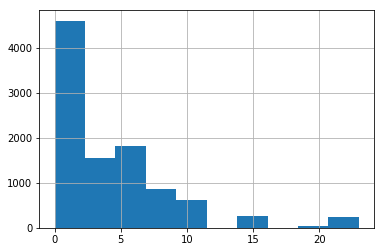

In [2392]:
data['Shops_1'].hist();

### Разбиение на train и valid

In [2393]:
from sklearn.model_selection import train_test_split

In [2394]:
train, valid = train_test_split(data, test_size=0.3, random_state=42)

In [2395]:
train.shape, valid.shape

((7000, 21), (3000, 21))

### Подготовка данных train, valid

In [2396]:
distr_info1 = train['DistrictId'].value_counts(normalize=True).reset_index().rename(columns={'index':'DistrictId', 
                                                                               'DistrictId':'flat_qty_distr'})

In [2397]:
distr_info1.head(10)

,DistrictId,flat_qty_distr
0,27,0.082000
1,1,0.066571
2,23,0.056286
3,6,0.050714
4,9,0.031714
5,62,0.025000
6,30,0.022857
7,53,0.019000
8,58,0.016857
9,21,0.015286


In [2398]:
def add_district_info1(df, distr_info1):
    df = pd.merge(df, distr_info1, on='DistrictId', how='left')
    df['flat_qty_distr'] = df['flat_qty_distr'].fillna(0.000143)
    return df

In [2399]:
distr_stat_dr = train.groupby(['DistrictId', 'Rooms'], as_index=False)[['Price']].median().\
    rename(columns={'Price':'median_price_dr'})
    
distr_stat_r = train.groupby(['Rooms'], as_index=False)[['Price']].median().rename(columns={'Price':'median_price_r'})

median_price = train['Price'].median()

In [2400]:
def add_stats(df, distr_stat_dr, distr_stat_r, median_price):
    df = pd.merge(df, distr_stat_dr, on=['DistrictId', 'Rooms'], how='left')
    df = pd.merge(df, distr_stat_r, on='Rooms', how='left')
    
    df['median_price_r'] = df['median_price_r'].fillna(median_price)
    df['median_price_dr'] = df['median_price_dr'].fillna(df['median_price_r'])
    return df

In [2401]:
def add_cat_fts(df, cat_fts=('Ecology_2', 'Ecology_3', 'Shops_2')):
    for col in cat_fts:
        df[col] = (df[col] == 'B').astype(int)
    return df

In [2402]:
def fillna_healthcare_1(df):
    df['Healthcare_1'] = df['Healthcare_1'].fillna(0)
    return df

In [2403]:
def prepare_data(df, distr_info1, distr_stat_dr, distr_stat_r, median_price):
    df = add_district_info1(df, distr_info1)
    df = add_stats(df, distr_stat_dr, distr_stat_r, median_price)
    df = add_cat_fts(df)
    df = fillna_healthcare_1(df)
    #df['HouseFloor'] = df['HouseFloor'].astype(int)
    return df

In [2404]:
train = prepare_data(train, distr_info1, distr_stat_dr, distr_stat_r, median_price)

In [2405]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,KitchenSquare2,flat_qty_distr,median_price_dr,median_price_r
0,14604,23,1.0,41.681380,22.796166,8.0,14,17.0,2015,0.075779,1,1,6,1437,3,0.0,0,2,1,88504.384965,64.0,0.056286,105350.440609,155440.820605
1,5621,23,3.0,163.495333,161.504222,12.0,5,3.0,1977,0.014073,1,1,2,475,0,0.0,0,0,1,207007.956663,144.0,0.056286,157606.065847,269162.365906
2,235,87,1.0,39.710131,19.538663,8.0,4,17.0,1986,0.100456,1,1,43,7227,0,0.0,1,6,0,182126.280899,64.0,0.003000,178279.774392,155440.820605
3,16258,48,3.0,96.056784,98.152802,1.0,15,1.0,2017,0.041125,1,1,46,9515,5,0.0,1,10,1,524365.550705,1.0,0.008857,397380.028528,269162.365906
4,10773,77,3.0,79.195825,44.421062,10.0,16,17.0,1984,0.298205,1,1,16,4048,3,0.0,1,3,1,322048.433990,100.0,0.004000,252818.703924,269162.365906


In [2406]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 0 to 6999
Data columns (total 24 columns):
Id                 7000 non-null int64
DistrictId         7000 non-null int64
Rooms              7000 non-null float64
Square             7000 non-null float64
LifeSquare         5514 non-null float64
KitchenSquare      7000 non-null float64
Floor              7000 non-null int64
HouseFloor         7000 non-null float64
HouseYear          7000 non-null int64
Ecology_1          7000 non-null float64
Ecology_2          7000 non-null int32
Ecology_3          7000 non-null int32
Social_1           7000 non-null int64
Social_2           7000 non-null int64
Social_3           7000 non-null int64
Healthcare_1       7000 non-null float64
Helthcare_2        7000 non-null int64
Shops_1            7000 non-null int64
Shops_2            7000 non-null int32
Price              7000 non-null float64
KitchenSquare2     7000 non-null float64
flat_qty_distr     7000 non-null float64
median_price_dr

In [2407]:
valid = prepare_data(valid, distr_info1, distr_stat_dr, distr_stat_r, median_price)

### Постороение модели

In [2408]:
train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price', 'KitchenSquare2',
       'flat_qty_distr', 'median_price_dr', 'median_price_r'],
      dtype='object')

In [2409]:
feats = ['Rooms', 'Square', 'flat_qty_distr', 'median_price_dr', 'Shops_1', 'Shops_2', 'Healthcare_1', 'Helthcare_2', 'HouseYear', 'KitchenSquare2','Floor', 'HouseFloor' ,'Ecology_1']

In [2410]:
from sklearn.ensemble import RandomForestRegressor as RF

In [2411]:
#Параметры модели и набор фич модели получена перебором

In [2412]:
model = RF(n_estimators=300, max_depth=14, random_state=42, max_features=5, min_samples_leaf=1,warm_start=True)

In [2413]:
model.fit(train.loc[:, feats], train['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=True)

In [2414]:
pred_train = model.predict(train.loc[:, feats])

In [2415]:
pred_train.shape

(7000,)

In [2416]:
pred_train

array([ 94592.87804918, 205800.863358  , 180378.5929318 , ...,
       238263.03996788, 201077.52654258, 410286.08647583])

In [2417]:
pred_valid = model.predict(valid.loc[:, feats])

In [2418]:
pred_valid.shape

(3000,)

In [2419]:
pred_valid

array([184208.17703903, 307890.87972126, 213514.63331916, ...,
       260026.56246483, 106900.22063463, 245302.18672496])

### Оценка модели

In [2420]:
from sklearn.metrics import r2_score as r2

In [2421]:
r2(train['Price'], pred_train)

0.9444779377486513

In [2422]:
r2(valid['Price'], pred_valid)

0.7134753162234098

### Получение данных в тестовой выборке

In [2423]:
# ?prepare_data

In [2424]:
test = pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [2425]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,5000.0,8412.595400,4832.674037,1.000000,4221.750000,8320.500000,12598.250000,16795.000000
DistrictId,5000.0,51.279200,44.179466,0.000000,21.000000,37.000000,77.000000,212.000000
Rooms,5000.0,1.910000,0.838594,0.000000,1.000000,2.000000,2.000000,17.000000
Square,5000.0,56.449500,19.092787,1.378543,41.906231,52.921340,66.285129,223.453689
LifeSquare,3959.0,36.158810,17.825287,0.333490,23.092026,32.925087,45.174091,303.071094
KitchenSquare,5000.0,5.976800,9.950018,0.000000,1.000000,6.000000,9.000000,620.000000
Floor,5000.0,8.632000,5.483228,1.000000,4.000000,7.000000,12.000000,78.000000
HouseFloor,5000.0,12.601000,6.789213,0.000000,9.000000,12.000000,17.000000,99.000000
HouseYear,5000.0,1984.392600,18.573149,1908.000000,1973.000000,1977.000000,2000.000000,2020.000000
Ecology_1,5000.0,0.119874,0.120070,0.000000,0.019509,0.072158,0.195781,0.521867


In [2426]:
test = prepare_data(test, distr_info1, distr_stat_dr, distr_stat_r, median_price)
test['KitchenSquare2'] = test['KitchenSquare'] ** 2
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 23 columns):
Id                 5000 non-null int64
DistrictId         5000 non-null int64
Rooms              5000 non-null float64
Square             5000 non-null float64
LifeSquare         3959 non-null float64
KitchenSquare      5000 non-null float64
Floor              5000 non-null int64
HouseFloor         5000 non-null float64
HouseYear          5000 non-null int64
Ecology_1          5000 non-null float64
Ecology_2          5000 non-null int32
Ecology_3          5000 non-null int32
Social_1           5000 non-null int64
Social_2           5000 non-null int64
Social_3           5000 non-null int64
Healthcare_1       5000 non-null float64
Helthcare_2        5000 non-null int64
Shops_1            5000 non-null int64
Shops_2            5000 non-null int32
flat_qty_distr     5000 non-null float64
median_price_dr    5000 non-null float64
median_price_r     5000 non-null float64
KitchenSquare2 

In [2427]:
test['Price'] = model.predict(test.loc[:, feats])

In [2428]:
test.loc[:, ['Id', 'Price']].to_csv('DVRemizov_predictions.csv', index=None)